# Project: Finding Donors for *CharityML*

This project involves the implementation of additional functionality in a notebook where some template code has been provided. Specific sections requiring further development are marked with headers labeled 'Implementation', followed by code blocks containing TODO statements. These indicate the areas that need attention and further coding. Each section includes a description of the task and the intended purpose of the implementation. Careful consideration is necessary to ensure that the provided functionality integrates seamlessly with the rest of the project.

Additionally, the project includes a series of questions designed to deepen understanding of the problem and the solution. These questions are marked with 'Question X' headers, and answers are expected in the following text boxes labeled 'Answer:'. Both the quality of the code implementation and the thoroughness of the answers will form the basis of the evaluation.

The primary objective of this project is to employ various supervised machine learning algorithms to accurately model individuals' income using data from the 1994 U.S. Census. The process involves evaluating multiple algorithms, selecting the best candidate based on preliminary results, and optimizing the chosen model for enhanced performance. The ultimate goal is to predict whether an individual earns more than $50,000 based on specific features.

This problem has practical applications, such as in non-profit organizations that rely on donations. By understanding an individual's income, organizations can make informed decisions about whom to contact and how to tailor their donation requests. While directly obtaining income data may be challenging, this project demonstrates how public features can be leveraged to infer income brackets effectively.

The dataset originates from the UCI Machine Learning Repository and was contributed by Ron Kohavi and Barry Becker. It was published in the article "Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid," which is available online. Minor modifications have been made to the dataset, such as removing the fnlwgt feature and addressing missing or ill-formatted records.

----
## Exploring the Data

The project begins by exploring the provided dataset to understand its structure and contents. The necessary Python libraries are loaded, followed by importing the census data. 

The target label for this analysis is the `income` column, which indicates whether an individual earns more than $50,000 or at most $50,000 annually. All other columns represent various features describing each individual in the census database. These features will be analyzed and processed to develop a predictive model.


In [3]:
# Import libraries necessary for this project
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration

This step involves a preliminary investigation of the dataset to gain insights into the distribution of individuals based on their income levels. The goal is to calculate key statistics that describe the data, including:

- The total number of records in the dataset (`n_records`).
- The number of individuals earning more than \$50,000 annually (`n_greater_50k`).
- The number of individuals earning at most \$50,000 annually (`n_at_most_50k`).
- The percentage of individuals earning more than \$50,000 annually (`greater_percent`).

These statistics will provide an overview of the dataset and help in understanding the class distribution for modeling purposes.

**Note:** Review the table above to ensure a clear understanding of how the `income` entries are formatted, as this will be necessary for accurate calculations.



In [4]:
# Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data['income'] == '>50K'])

# Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data['income'] == '<=50K'])

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


**Featureset Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


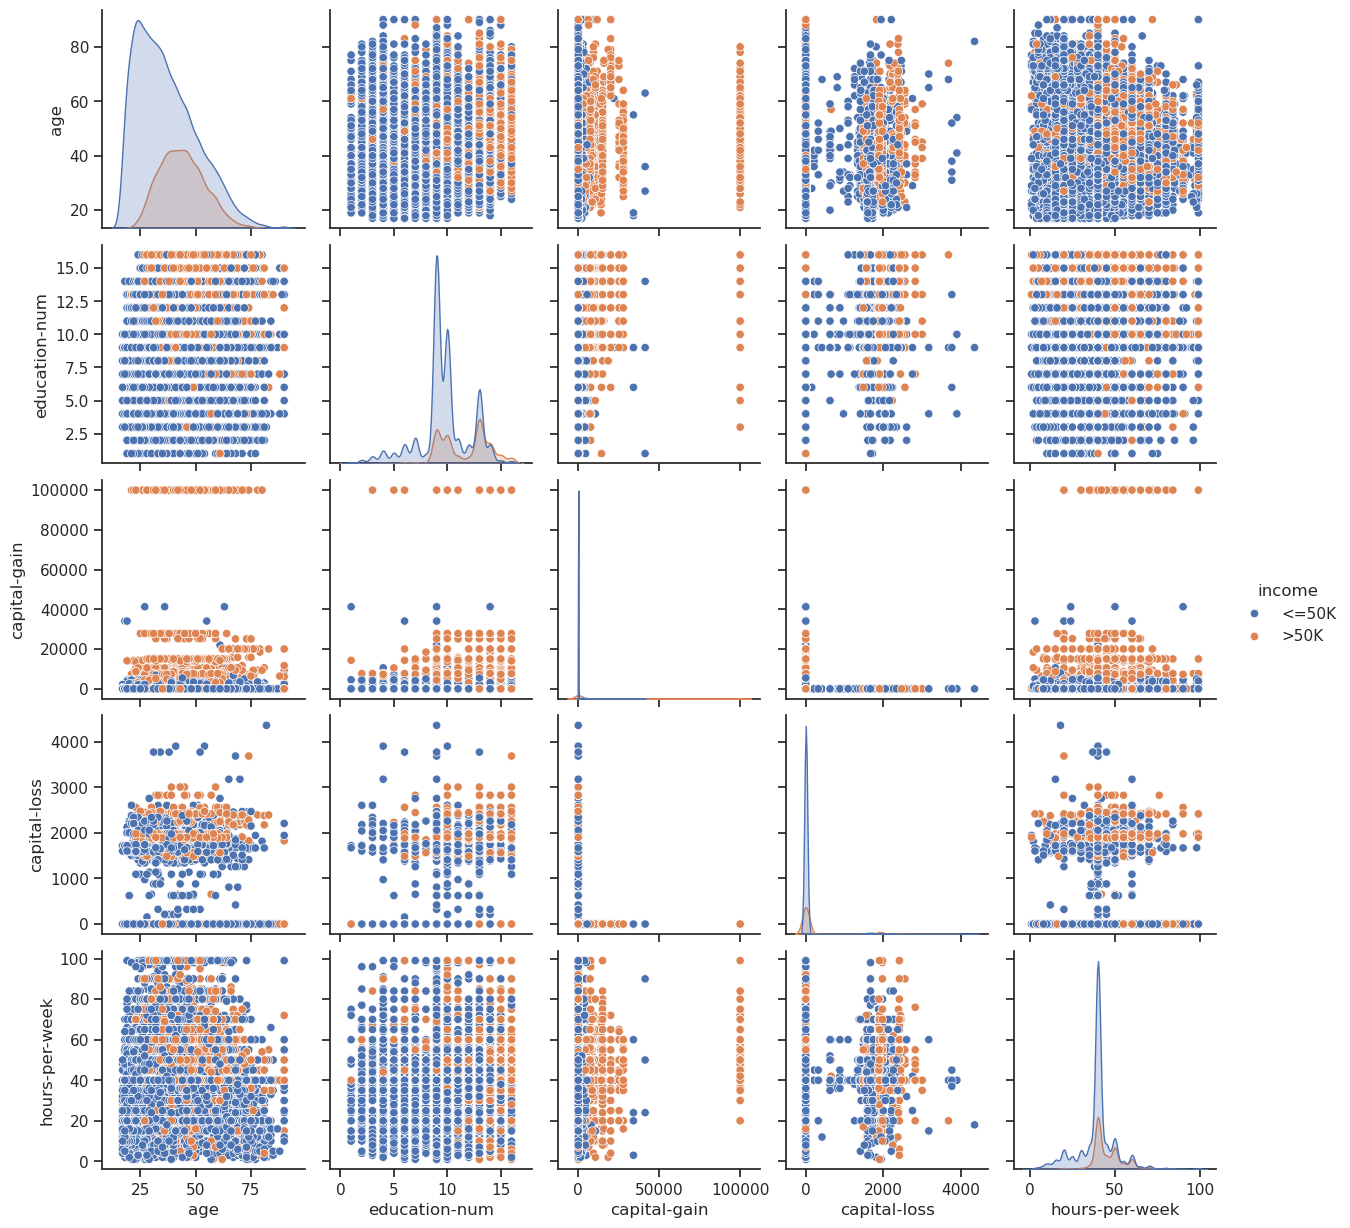

In [4]:
sns.pairplot(data, hue="income");

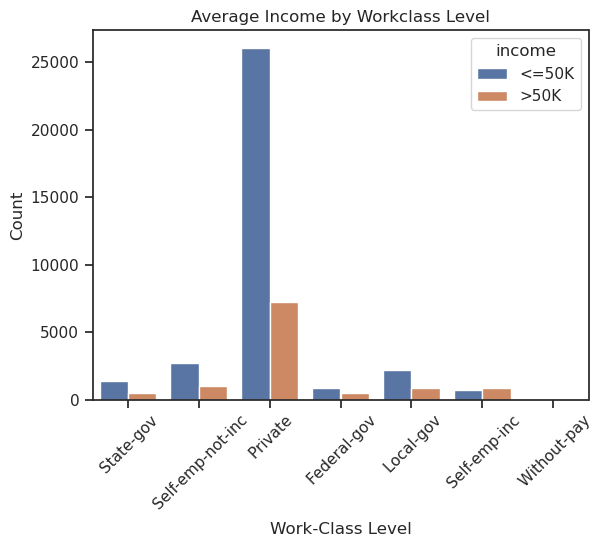

In [5]:
sns.countplot(x='workclass', hue='income', data=data)
plt.xticks(rotation=45)

plt.title('Average Income by Workclass Level')
plt.xlabel('Work-Class Level')
plt.ylabel('Count')
plt.show()

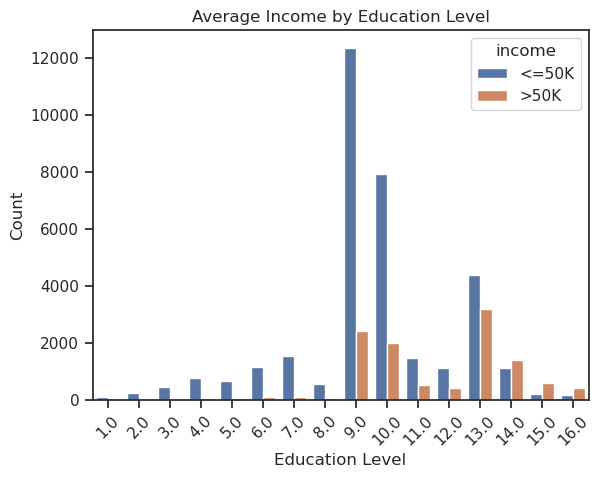

In [6]:
sns.countplot(x='education-num', hue='income', data=data)
plt.xticks(rotation=45)

plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

Skewness:
 capital-gain    11.789002
capital-loss     4.516304
dtype: float64


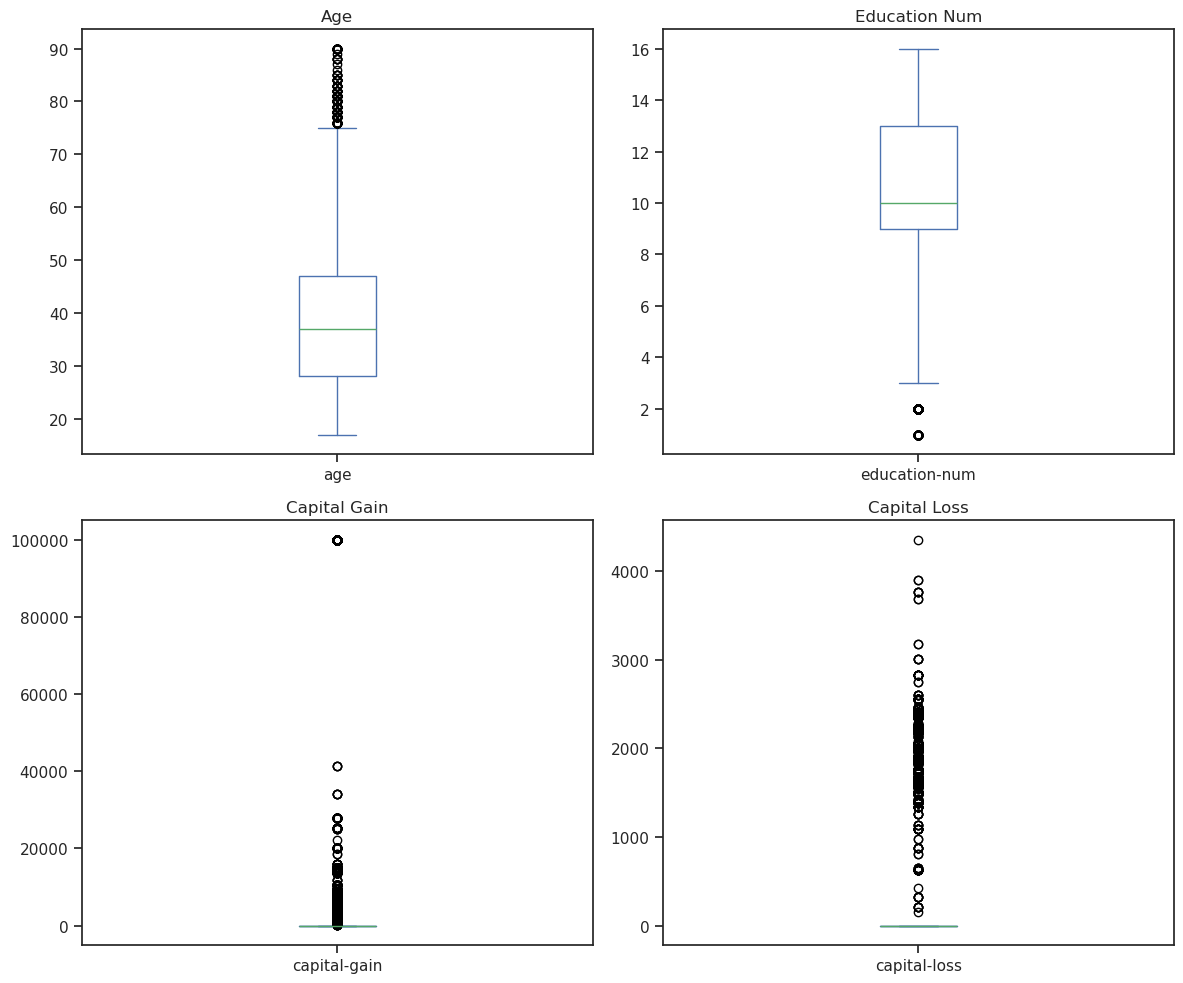

In [5]:
skewed = ['capital-gain', 'capital-loss']
skewness = data[skewed].skew()
print("Skewness:\n", skewness)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
data['age'].plot.box(ax=axes[0, 0], title='Age')
data['education-num'].plot.box(ax=axes[0, 1], title='Education Num')
data['capital-gain'].plot.box(ax=axes[1, 0], title='Capital Gain')
data['capital-loss'].plot.box(ax=axes[1, 1], title='Capital Loss')
plt.tight_layout()
plt.show()

## Preparing the Data

Before data can be used as input for machine learning algorithms, it must often undergo cleaning, formatting, and restructuring—a process commonly referred to as **preprocessing**. For this dataset, there are no invalid or missing entries that require handling. However, certain features have qualities that need adjustment to improve their compatibility with machine learning algorithms. Proper preprocessing can significantly enhance the predictive power and effectiveness of learning algorithms.

---

### Transforming Skewed Continuous Features

Datasets may include features with values concentrated near a specific number, while also containing a significant number of extreme values either much larger or smaller. Such features can lead to suboptimal performance in many machine learning algorithms due to their sensitivity to the range and distribution of values. 

In the census dataset, the features `capital-gain` and `capital-loss` exhibit this behavior. To better understand these features, their distributions can be visualized using histograms. Observe the range and skewness of the values present to inform any necessary transformations.


/home/oliver/project-showroom/data-science/finding-donors/visuals.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


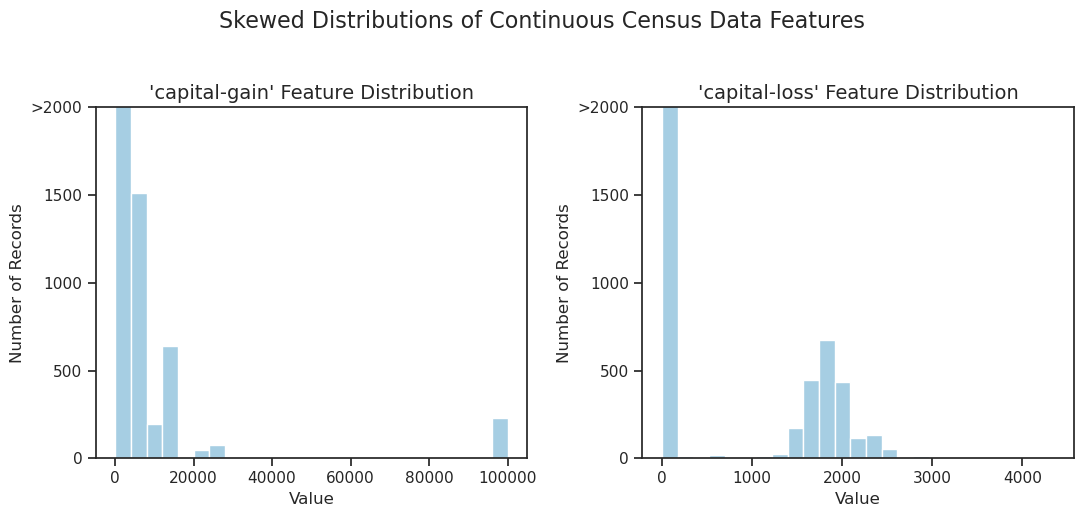

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `capital-gain` and `capital-loss`, it is common practice to apply a [logarithmic transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)) on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of 0 is undefined, so we must translate the values by a small amount above 0 to apply the the logarithm successfully.

/home/oliver/project-showroom/data-science/finding-donors/visuals.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


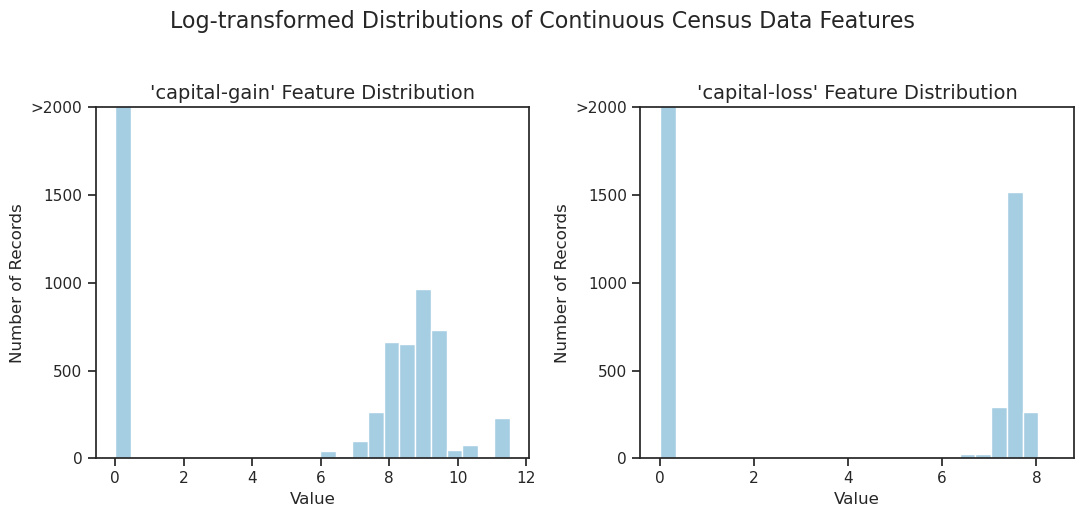

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `capital-gain` or `capital-loss` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize a scaler, then apply it to the features
scaler = StandardScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.034201,State-gov,Bachelors,1.128753,Never-married,Adm-clerical,Not-in-family,White,Male,2.815336,-0.222752,-0.078120,United-States
1,0.866417,Self-emp-not-inc,Bachelors,1.128753,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.300328,-0.222752,-2.326738,United-States
2,-0.041455,Private,HS-grad,-0.438122,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.300328,-0.222752,-0.078120,United-States
3,1.093385,Private,11th,-1.221559,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.300328,-0.222752,-0.078120,United-States
4,-0.798015,Private,Bachelors,1.128753,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.300328,-0.222752,-0.078120,Cuba


### Implementation: Data Preprocessing

In the dataset, several features are non-numeric, as shown in the **Exploring the Data** section. Since most learning algorithms require numeric input, these non-numeric features (called *categorical variables*) must be converted into a numeric format. A common approach is **one-hot encoding**, which creates a _dummy variable_ for each possible category of a non-numeric feature.

For example, if a feature `someFeature` has three possible categories (`A`, `B`, or `C`), one-hot encoding would transform it as follows:

|   | someFeature |                    
| :-: | :-: |                            
| 0 |  B  |  
| 1 |  C  |
| 2 |  A  |  

Becomes:

|| someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: | :-: | :-: |
|0| 0 | 1 | 0 |
|1| 0 | 0 | 1 |
|2| 1 | 0 | 0 |

Similarly, the target label `income` must also be converted into numeric format. Since this label has only two possible categories ("<=50K" and ">50K"), it can be encoded directly as 0 and 1, respectively, without requiring one-hot encoding.

In this step, the following tasks need to be completed:
- Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `features_log_minmax_transform` dataset.
- Convert the `income_raw` target label into numeric entries:
  - Encode records with "<=50K" as 0.
  - Encode records with ">50K" as 1.

These transformations will prepare the dataset for input into machine learning algorithms.


In [9]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country', 'education_level', 'race'])

# Encode the 'income_raw' data to numerical values
income = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print(encoded)
features_final

103 total features after one-hot encoding.


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.034201,1.128753,2.815336,-0.222752,-0.078120,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.866417,1.128753,-0.300328,-0.222752,-2.326738,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,-0.041455,-0.438122,-0.300328,-0.222752,-0.078120,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
3,1.093385,-1.221559,-0.300328,-0.222752,-0.078120,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.798015,1.128753,-0.300328,-0.222752,-0.078120,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.419735,1.128753,-0.300328,-0.222752,-0.078120,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
45218,0.034201,1.128753,-0.300328,-0.222752,-0.411249,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
45219,-0.041455,1.128753,-0.300328,-0.222752,0.754701,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
45220,0.412481,1.128753,3.188207,-0.222752,-0.078120,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor

CharityML's primary goal is to identify individuals who make more than \$50,000 annually, as they are most likely to donate to the charity. Given this goal, using **accuracy** alone to evaluate a model's performance may seem appropriate. However, misclassifying individuals who do not make more than \$50,000 as high earners could be detrimental. Therefore, it is crucial to prioritize a model's ability to **precisely identify those who make more than \$50,000**, which is more important than its ability to **recall** all such individuals. 

To balance precision and recall, the **F-beta score** is a suitable metric. It considers both metrics in a weighted manner:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{\text{precision} \cdot \text{recall}}{\left( \beta^2 \cdot \text{precision} \right) + \text{recall}} $$

When $\beta = 0.5$, the **F$_{0.5}$ score** places more emphasis on precision, making it the ideal choice for this problem.

The class distribution in this dataset shows that most individuals do not make more than \$50,000. This imbalance significantly affects **accuracy**, as a naive model could predict "this person does not make more than \$50,000" for every individual and achieve high accuracy. Such a naive prediction would, however, fail to identify any potential donors, rendering it useless for CharityML. Hence, establishing a **naive prediction benchmark** helps evaluate the model's effectiveness beyond simple accuracy.

---

#### Note: Recap of Accuracy, Precision, and Recall

- **Accuracy**: Measures how often the model's predictions are correct. It is the ratio of correct predictions to the total number of predictions:

$$ \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} $$

- **Precision**: Measures the proportion of predicted positives (e.g., high earners) that are actually correct. It is calculated as:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

- **Recall (Sensitivity)**: Measures the proportion of actual positives (e.g., high earners) that are correctly identified. It is calculated as:

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

In scenarios where class distributions are skewed, such as this dataset, accuracy is not always a reliable metric. For instance, if only 2 out of 100 individuals are high earners, predicting that no one is a high earner can yield high accuracy but fail in identifying the target group. Precision and recall, along with their harmonic mean (F1 score), provide more meaningful insights. The F1 score ranges from 0 to 1, with 1 being the best, and it balances precision and recall, making it especially useful for imbalanced datasets.


### Question 1 - Naive Predictor Performance

If we were to use a model that always predicted an individual made more than \$50,000, it would represent a naive approach with no intelligence or insight. This prediction model provides a baseline for comparison to evaluate the performance of more sophisticated models. The purpose of this naive predictor is to demonstrate how a basic model would perform, and it is not intended to be a viable solution.

In this scenario, the naive model would always predict 1 (indicating that an individual makes more than \$50,000). Consequently:
- **True Negatives (TN)**: There are none, as the model never predicts 0.
- **False Negatives (FN)**: There are none, as the model never predicts 0.
- **True Positives (TP)**: All actual positives (individuals who make more than \$50,000) are predicted correctly.
- **False Positives (FP)**: All actual negatives (individuals who make \$50,000 or less) are incorrectly predicted as positives.

Given this setup:
- **Accuracy** becomes equivalent to **Precision**, as the denominator includes all records (the total number of True Positives and False Positives).
- **Recall** becomes 1, as there are no False Negatives, and all True Positives are correctly identified.

The naive predictor serves as a benchmark, showing the performance of a model without any intelligent decision-making. Any real-world model should aim to outperform this baseline. 

**HINT**: 
- Precision (or accuracy, in this case) can be calculated as:

$$ \text{Precision (Accuracy)} = \frac{\text{True Positives}}{\text{Total Records}} $$

- Recall will always be 1 since there are no False Negatives:

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} = 1 $$

Using these values, you can compute the **F-beta score** with $ \beta = 0.5 $ to evaluate the naive predictor.


In [11]:
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP)
recall = 1
precision = accuracy

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * (precision * recall) / ((0.5**2*precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [scikit-learn](http://scikit-learn.org/stable/supervised_learning.html) **that we may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application

**Support Vector Machines (SVM)**

- **Real-world application**: In bioinformatics, SVMs can be applied to detect patterns in genetic and protein data, such as classifying cancer types based on gene expression data.
- **Strengths**:
  - Effective in high-dimensional spaces; works well with datasets that have many features.
  - Robustness in handling non-linear relationships using kernel tricks.
- **Weaknesses**:
  - Computationally intensive, especially for large datasets.
  - Complex parameter tuning, requiring careful selection of kernel and hyperparameters.
- **Why this model is suitable**: The dataset has many features, and the ability of SVMs to handle high-dimensional data and potentially non-linear relationships makes it a good choice.

Sources:
- [Censius](https://censius.ai/blogs/machine-learning-model-selection-techniques)
- [Wikipedia: Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)
- [Spiceworks: SVM](https://www.spiceworks.com/tech/big-data/articles/what-is-support-vector-machine/)

---

**Logistic Regression**

- **Real-world application**: Logistic regression is often used in credit card fraud detection, where it predicts fraud based on transaction patterns, geolocation, and other transactional data.
- **Strengths**:
  - Simplicity: Easy and quick to train and implement.
  - Efficiency: Suitable for large datasets and scalable.
- **Weaknesses**:
  - Limited to linear separability: Struggles with non-linear relationships unless augmented with polynomial or interaction terms.
- **Why this model is suitable**: Logistic regression is quick to train and implement, handles large datasets well, and the target variable is binary, making it a straightforward and efficient choice for this problem.

Sources:
- [Censius](https://censius.ai/blogs/machine-learning-model-selection-techniques)
- [Wikipedia: Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)
- [GeeksforGeeks: Understanding Logistic Regression](https://www.geeksforgeeks.org/understanding-logistic-regression/)

---

**Random Forests**

- **Real-world application**: Random forests are widely used in medical diagnostics, such as predicting diabetes or heart disease and analyzing mammographies for breast cancer detection.
- **Strengths**:
  - Reduction of overfitting: Combines several smaller decision trees (forest), each applied to a subset of the dataset.
  - Stability: Averages predictions from multiple trees, improving robustness.
  - Flexibility: Captures complex non-linear relationships between features.
- **Weaknesses**:
  - Computationally intensive, especially for very large datasets or high numbers of trees.
- **Why this model is suitable**: The census dataset likely involves complex interactions between features, and random forests can handle such complexities effectively while reducing overfitting.

Sources:
- [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)
- [Wikipedia: Random Forest](https://en.wikipedia.org/wiki/Random_forest)


### Implementation - Creating a Training and Predicting Pipeline

To effectively evaluate the performance of each selected model, a training and prediction pipeline is necessary. This pipeline should allow for quick and systematic training of models on various training data sizes and enable predictions on the testing data. The implementation of this pipeline will serve as the foundation for subsequent sections.

In this implementation, the following tasks are performed:

- **Import required metrics**: `fbeta_score` and `accuracy_score` are imported from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to evaluate model performance.
- **Fit the learner**: The selected model is fitted to the sampled training data, and the training time is recorded to measure efficiency.
- **Perform predictions**: Predictions are conducted on the test dataset (`X_test`) as well as on the first 300 training points (`X_train[:300]`), with the total prediction time being logged.
- **Calculate accuracy scores**: Accuracy is computed for both the training subset and the testing set to assess model performance.
- **Calculate F-scores**: The F-score, which considers both precision and recall, is calculated for the training subset and the testing set. It is important to set the `beta` parameter for proper evaluation.

This structured pipeline ensures a consistent and thorough evaluation of each model across different conditions and datasets.


In [12]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first sample_size training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first sample_size training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:sample_size], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

This section involves the initial evaluation of three supervised learning models chosen in the previous section. The purpose is to establish a baseline performance for each model under different training data sizes. 

The following tasks are performed:

- **Import Models**: Import the three supervised learning models discussed earlier.
- **Initialize Models**: Each model is initialized and assigned to `clf_A`, `clf_B`, and `clf_C`.
  - Use a `random_state` parameter for reproducibility if the model provides this option.
  - Default settings are used for each model, as hyperparameter tuning will be performed later on a specific model.
- **Sample Training Data**: Calculate and define sample sizes corresponding to 1%, 10%, and 100% of the training dataset. 
  - These values are stored in `samples_1`, `samples_10`, and `samples_100`, respectively.

**Important Notes**:
- The computation may take some time to complete, depending on the algorithms chosen and the size of the dataset.
- This evaluation step lays the groundwork for understanding how each model performs across varying data sizes.


SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.


/home/oliver/project-showroom/data-science/finding-donors/visuals.py:122: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  pl.tight_layout()


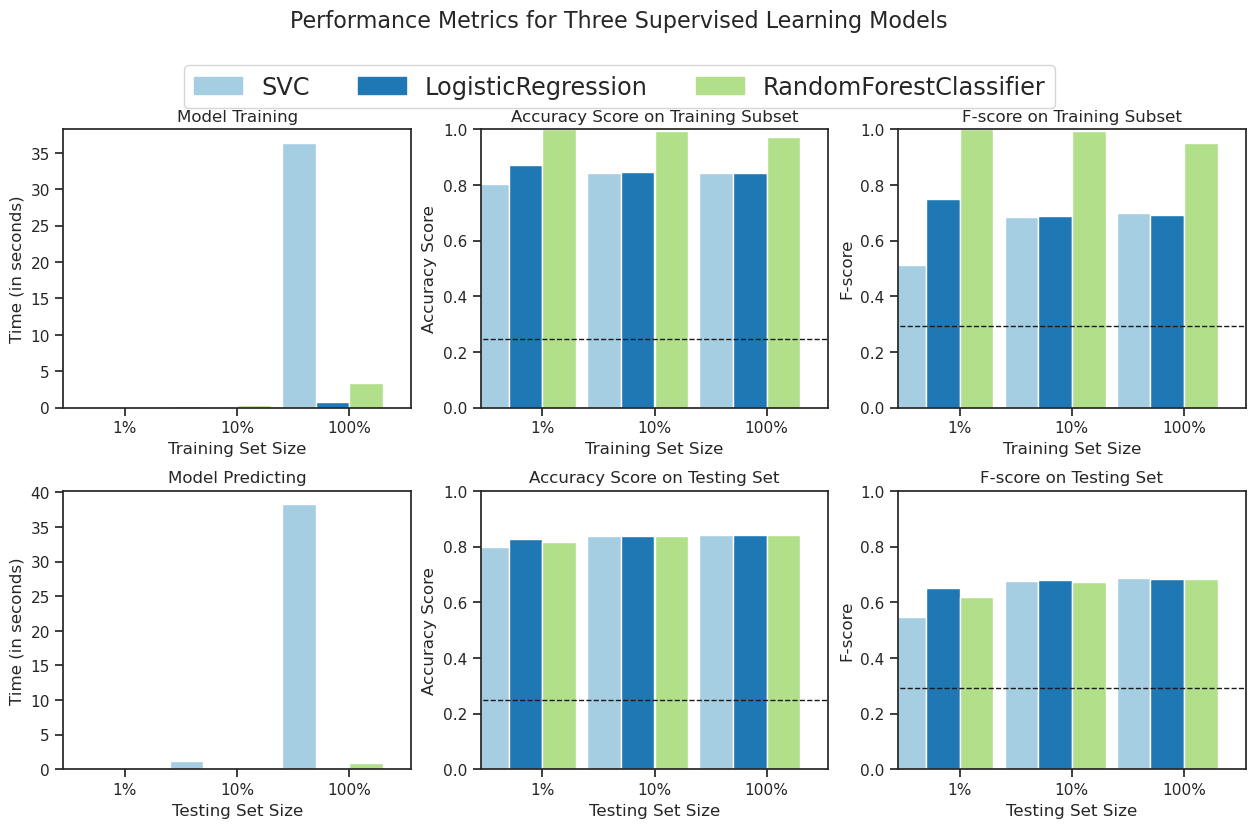

In [13]:
# Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize the three models
clf_A = SVC(gamma='auto')
clf_B = LogisticRegression()
clf_C =  RandomForestClassifier()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

## Improving Results

In this final section, the objective is to identify the most suitable model among the three supervised learning algorithms previously evaluated for predicting individuals' income levels. After selecting the optimal model, a grid search optimization will be conducted over the entire training set (`X_train` and `y_train`) to fine-tune at least one parameter, aiming to enhance the model's F-score beyond the performance of the untuned version.

### Question 3 - Choosing the Best Model

*Based on the earlier evaluations, which of the three models is most appropriate for identifying individuals earning more than $50,000?*

**Answer:**

Among the evaluated models, the Random Forest Classifier emerges as the most appropriate for this task. It achieved the highest F-score on the testing set when utilizing 100% of the training data, indicating superior precision and recall in identifying individuals earning above $50,000. Although its training time was longer compared to Logistic Regression, it remained within acceptable limits, and the prediction time was efficient. The Random Forest algorithm's ability to handle complex, non-linear relationships and its robustness against overfitting make it well-suited for the diverse features present in the census data.

### Question 4 - Describing the Model in Layman's Terms

*How does the chosen model function?*

**Answer:**

The Random Forest Classifier operates by creating a "forest" of multiple decision trees. Each decision tree is trained on a random subset of the data and makes its own prediction about whether an individual earns more than $50,000. When making a final decision, the Random Forest takes into account the predictions from all the individual trees and selects the outcome that the majority of trees agree upon. This approach enhances accuracy and reliability because it aggregates the insights from numerous decision paths, reducing the likelihood of errors that might occur if relying on a single decision tree. In essence, it's akin to consulting a panel of experts and adopting the consensus opinion, leading to more robust and dependable predictions.


**Answer:** 

So, Logistic Regression is a model we chose for figuring out who might earn more than $50,000 a year. It's pretty straightforward and works a bit like a decision-making process. What it does is look at different things about a person, like their age, education, and job type, and tries to spot patterns based on past data we gave it. Think of it as a checklist where each item has a score that shows how important it is for predicting someone's income.

When the model is asked to make a prediction, it uses this checklist to calculate a probability for each person. If the probability is high, it predicts the person earns more than $50,000; if it's low, it predicts less. I picked this model because it’s fast and doesn’t need a lot of computing power, unlike some other models like SVC. Even though I’m still learning, I think Logistic Regression is a good fit for CharityML because it can quickly and efficiently find potential donors who might be willing to donate.

**Addendum**:

I've tried first the LogisticRegression, but that doesn't yield satisfying results. So I decided to try out RandomForest and SVC and so I redecided to work with the RandomForest model.


### Implementation: Model Tuning

The goal is to fine-tune the selected model using `GridSearchCV` by exploring at least one important parameter with three or more different values. The entire training set (`X_train`, `y_train`) will be used for this process. Below are the key steps implemented:

- Import `GridSearchCV` from `sklearn.model_selection` and `make_scorer` from `sklearn.metrics`.
- Initialize the chosen classifier and assign it to `clf`. Set the `random_state` parameter to ensure consistency with earlier configurations.
- Define a dictionary of parameters to tune for the selected model. The dictionary should specify the parameter names and their respective ranges of values to test.
  - Example: `parameters = {'n_estimators': [10, 50, 100]}`
  - **Note:** Avoid tuning the `max_features` parameter if available, as it can introduce instability in some algorithms.
- Create a scoring function using `make_scorer` for the `fbeta_score` metric, setting $\beta = 0.5$ to emphasize precision over recall.
- Perform grid search with the `GridSearchCV` object, passing in the classifier (`clf`), the scoring function (`scorer`), and the parameter grid (`parameters`). Store the result in `grid_obj`.
- Fit the grid search object to the training data to determine the optimal parameters, and store the result in `grid_fit`.

**Note:** The execution time for this process may vary significantly depending on the model and the parameter search space. For best results, choose parameters wisely to balance thoroughness and efficiency.


I initially tried using the Logistic Regression classifier, but it didn't yield good results, even without feature importance and parameter tuning using GridSearchCV. Therefore, I switched to Random Forests, which performed slightly better, improving results by about 5% compared to the unoptimized version.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

# Initialize an unoptimized Random Forest model
rf_unoptimized = RandomForestClassifier(random_state=42)

# Train the unoptimized model
rf_unoptimized.fit(X_train, y_train)

# Make predictions with the unoptimized model
unoptimized_rf_predictions = rf_unoptimized.predict(X_test)

# Evaluate the unoptimized model
unoptimized_rf_accuracy = accuracy_score(y_test, unoptimized_rf_predictions)
unoptimized_rf_f_score = fbeta_score(y_test, unoptimized_rf_predictions, beta=0.5)

print("\nUnoptimized Random Forest Model\n------")
print("Accuracy score on testing data: {:.4f}".format(unoptimized_rf_accuracy))
print("F-score on testing data: {:.4f}".format(unoptimized_rf_f_score))
print()

# Initialize the random forest classifier and optimize it with gridsearch
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define parameter grid for Random Forest
rf_parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the fbeta score object
rf_scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search
rf_grid_obj = GridSearchCV(estimator=rf_clf, param_grid=rf_parameters, scoring=rf_scorer, cv=5, n_jobs=-1)
rf_grid_fit = rf_grid_obj.fit(X_train, y_train)

print("RF GridFit: best parameters found: ", rf_grid_fit.best_params_)
print()

# Get the best estimator
best_rf_clf = rf_grid_fit.best_estimator_

# Make predictions with the optimized Random Forest model
rf_predictions = best_rf_clf.predict(X_test)

# Evaluate the optimized Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f_score = fbeta_score(y_test, rf_predictions, beta=0.5)

print("\nOptimized Random Forest Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(rf_accuracy))
print("Final F-score on the testing data: {:.4f}".format(rf_f_score))



Unoptimized Random Forest Model
------
Accuracy score on testing data: 0.8432
F-score on testing data: 0.6831



/home/oliver/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RF GridFit: best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Optimized Random Forest Model
------
Final accuracy score on the testing data: 0.8595
Final F-score on the testing data: 0.7312


Another approach with LogisticRegression and GridSearch:

In [15]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score
from sklearn.linear_model import LogisticRegression

# Initialize the classifier
# Initialize the classifier for unoptimized comparison
clf_unoptimized = LogisticRegression(solver='lbfgs', random_state=42)

# Initialize a fresh instance for grid search
clf_for_grid_search = LogisticRegression(solver='lbfgs', random_state=42)

# Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# Here, we're tuning the regularization strength 'C' and the penalty type ('l1' or 'l2')
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2']
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf_for_grid_search, param_grid=parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data to find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

print("GridFit: best parameters found: ", grid_fit.best_params_)
print()

# Get the estimator with the best parameters
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model
unoptimized_predictions = clf_unoptimized.fit(X_train, y_train).predict(X_test)

# Make predictions using the optimized model
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, unoptimized_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, unoptimized_predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/home/oliver/anaconda3/envs/pytorch_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridFit: best parameters found:  {'C': 0.1, 'penalty': 'l2'}

Unoptimized model
------
Accuracy score on testing data: 0.8420
F-score on testing data: 0.6833

Optimized Model
------
Final accuracy score on the testing data: 0.8423
Final F-score on the testing data: 0.6844


Ok, for completeness lets try SVC and see if it can do a better job as RandomForest:

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score

# Initialize an unoptimized SVM model
svm_unoptimized = SVC(random_state=42)

# Train the unoptimized model
svm_unoptimized.fit(X_train, y_train)

# Make predictions with the unoptimized model
unoptimized_svm_predictions = svm_unoptimized.predict(X_test)

# Evaluate the unoptimized model
unoptimized_svm_accuracy = accuracy_score(y_test, unoptimized_svm_predictions)
unoptimized_svm_f_score = fbeta_score(y_test, unoptimized_svm_predictions, beta=0.5)

print("\nUnoptimized SVM Model\n------")
print("Accuracy score on testing data: {:.4f}".format(unoptimized_svm_accuracy))
print("F-score on testing data: {:.4f}".format(unoptimized_svm_f_score))

# Initialize the SVM classifier and optimize it with gridsearch
svm_clf = SVC(random_state=42)

# Define parameter grid for SVM
svm_parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Create the fbeta score object
svm_scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search
svm_grid_obj = GridSearchCV(estimator=svm_clf, param_grid=svm_parameters, scoring=svm_scorer, cv=5, n_jobs=-1)
svm_grid_fit = svm_grid_obj.fit(X_train, y_train)

print("\nSVM GridFit: best parameters found: ", svm_grid_fit.best_params_)

# Get the best estimator
best_svm_clf = svm_grid_fit.best_estimator_

# Make predictions with the optimized SVM model
optimized_svm_predictions = best_svm_clf.predict(X_test)

# Evaluate the optimized SVM model
optimized_svm_accuracy = accuracy_score(y_test, optimized_svm_predictions)
optimized_svm_f_score = fbeta_score(y_test, optimized_svm_predictions, beta=0.5)

print("\nOptimized SVM Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(optimized_svm_accuracy))
print("Final F-score on the testing data: {:.4f}".format(optimized_svm_f_score))



Unoptimized SVM Model
------
Accuracy score on testing data: 0.8533
F-score on testing data: 0.7141


: 

: 

: 

Ok, SVM took a long time. And the results aren't significantly better than the RandomForest, so I intent to switch to the RandomForest model because of the not so good performance of the LogisticRegression model. 

### Question 5 - Final Model Evaluation

- **What is your optimized model's accuracy and F-score on the testing data?**
- **Are these scores better or worse than the unoptimized model?**
- **How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?**


#### Results for RandomTreeForest:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.8432            | 0.8595          |
| F-score        | 0.6831            | 0.7312          |


**Answer:**

The optimized model's accuracy and F-score on the testing data were as follows:

- **Accuracy Score:** 0.8595
- **F-score:** 0.7312

Compared to the unoptimized model, these scores are better but remain similar. The optimization using GridSearchCV fine-tuned the parameters, but the improvements in performance were minimal but the F-score was significant. Despite this, the optimized model outperformed the naive predictor benchmarks from **Question 1** by a large margin, showcasing its ability to generalize and provide meaningful predictions.

Among the methods tested (SVM, RandomForest, LogisticRegression), the RandomForestClassifier emerged as the best-performing model. However, further optimization attempts did not result in a significant increase in the F-score. This suggests that the model may already be near its performance limit for this dataset.

## Feature Importance

Understanding which features provide the most predictive power is a crucial aspect of supervised learning. By identifying and focusing on the relationship between the most relevant features and the target label, we can simplify our understanding of the problem at hand. For this project, the goal is to determine the key features that strongly predict whether an individual earns at most or more than $50,000 annually.

Using a scikit-learn classifier such as AdaBoost or Random Forests, which includes the `feature_importance_` attribute, we can rank the features by their predictive power. In the following code cell, a chosen classifier will be fitted to the training dataset, and the top 5 features for the census dataset will be identified based on their importance.


### Question 6 - Feature Relevance Observation

When **Exploring the Data**, we observed that the dataset contains thirteen features for each individual. Among these features, which five do you believe to be the most important for prediction? In what order would you rank them, and why?

**Answer:**

1. **Age**: Age is a strong predictor of income. Typically, older individuals have accumulated more work experience, which often correlates with higher salaries.
2. **Education Level**: Education level is an excellent indicator of earning potential. Higher education generally leads to better job opportunities and higher income.
3. **Education Number**: Although this feature might overlap with education level, it provides additional granularity about years spent in education, which can also influence earning potential.
4. **Marital Status**: Married individuals tend to have more stable lives and often higher income due to dual-earner households or increased financial stability.
5. **Work Class**: Work class reflects the type of employment, which directly impacts income. For example, individuals in the private sector or self-employed often have varying earning potential compared to those in government roles.

These features are intuitively linked to income levels and align well with societal and economic trends.

### Implementation - Extracting Feature Importance

To analyze the importance of features in predicting whether an individual earns more or less than $50,000, a supervised learning model from `scikit-learn` will be used. This model must include the `feature_importances_` attribute, which ranks each feature's relevance in the decision-making process.

The implementation will involve the following steps:
1. Import a suitable supervised learning algorithm from `scikit-learn`. If using a new algorithm, ensure it supports the `feature_importances_` attribute.
2. Train the chosen model on the entire training dataset.
3. Extract and display the importance of each feature using the `.feature_importances_` attribute.

The feature importances will provide insight into which features are most predictive, guiding potential feature selection and model simplification.

```python
# Import necessary libraries and the chosen supervised learning model
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train the model on the entire training set
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 5 important features
print(feature_importances.head())
```

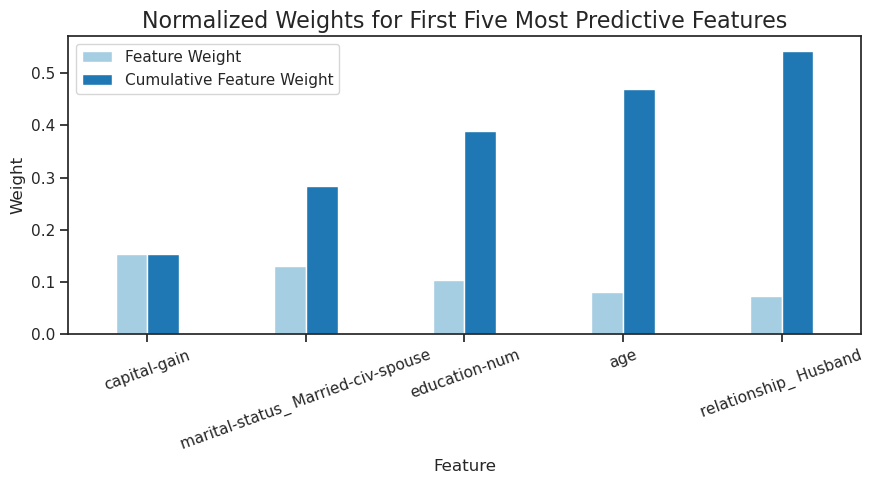

In [16]:
model = best_rf_clf

#Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above, which highlights the five most relevant features for predicting whether an individual earns at most or above $50,000. 

- **How do these five features compare to the five features you discussed in Question 6?**
- **If you were close to the same answer, how does this visualization confirm your thoughts?**
- **If you were not close, why do you think these features are more relevant?**

**Answer:**

It appears that I correctly identified 3 out of the 5 most important features: `age`, `education-num`, and `marital-status`. However, the other two features I suggested were not included. Instead, the visualization identified `relationship_Husband` as an important feature. This makes sense, as in traditional family structures, the husband is often perceived as the primary income earner, making this feature highly relevant. The visualization confirms my thoughts for the correctly predicted features by reinforcing their importance, as these features strongly align with intuition and societal trends. However, I underestimated the significance of relational and household dynamics, as reflected by `relationship_Husband`.

---

### Feature Selection

Reducing the number of features in a model can offer benefits, such as reduced training and prediction times. From the visualization above, we observe that the top five most important features collectively account for more than half of the importance across all features. This observation suggests that the feature space can be simplified while still retaining a significant portion of the model's predictive power. 

The following code cell will train the previously optimized model using only the top five important features identified earlier. By comparing the performance of this reduced model to the full-featured model, we can evaluate the trade-off between simplicity and predictive accuracy.


In [17]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_rf_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, rf_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, rf_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8595
F-score on testing data: 0.7312

Final Model trained on reduced data
------
Accuracy on testing data: 0.8423
F-score on testing data: 0.6869


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Hmm, reducing the training set (and testing set) to only the five most important features reduced the F-Score and the Accuracy a little. But not as much as one could guess when only 5 features remain in the training data from orginal nearly 100 features (because of one hot encoding of categorial values). That is fascinating and could tell us that some of the features aren't especially important or there is much redundance in the data set. 

To the question regarding the training time: I think the F-Score is more important than the training time (in the scenario with the census data) because there is no advantage when the model can be trained faster, but the performance is not as good as with a more slower approach.